In [1]:
"""
Name: Divyansh Mishra     
RollNo-27

Section-P

Topic: Covid19 CT scans analysis
     
GLA University,Mathura

"""     


'\nName-Janvi Gupta          \nRollNo-37\n\nName: Divyansh Mishra     \nRollNo-27\n\nSection-P\n\nTopic: Covid19 CT scans analysis\n     \nGLA University,Mathura\n\n'

In [2]:
# Importing needed packages
import numpy as np
import os
import cv2
from glob import glob
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import f1_score


paths_to_covid_images = glob(os.path.join(os.getcwd(),'CT_COVID\\*.png'))
paths_to_non_covid_images = glob(os.path.join(os.getcwd(),'CT_NonCOVID\\*.png'))
paths_to_non_covid_images.extend(glob(os.path.join(os.getcwd(),'CT_NonCOVID\\*.jpg')))


print("no. of non - covid scans = ",len(paths_to_non_covid_images))
print("no. of covid scans = ",len(paths_to_covid_images))
print("Total no. of scans = ",len(paths_to_non_covid_images)+len(paths_to_covid_images))

no. of non - covid scans =  397
no. of covid scans =  349
Total no. of scans =  746


original size: (294, 383, 3) resized to: (256, 256, 3)


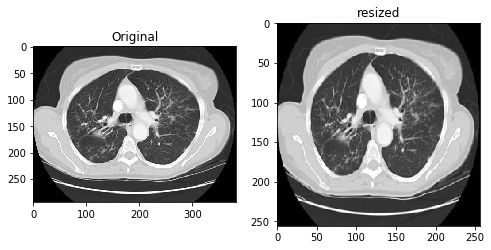

In [2]:
# Example of a scanned image and resizing it to (256 by 256) PIXELS

image_no = 45  # out of 397 scans

original_image_array = cv2.imread(paths_to_non_covid_images[image_no])
resized_image_array = cv2.resize(original_image_array, (256,256), interpolation=cv2.INTER_LINEAR)


f = plt.figure(figsize=(8, 8))
f.add_subplot(1, 2, 1)
plt.imshow(original_image_array) , plt.title("Original")
f.add_subplot(1,2, 2)
plt.imshow(resized_image_array) , plt.title("resized")    

print("original size:",original_image_array.shape, "resized to:",resized_image_array.shape)

In [4]:
x_trainig_set_of_orig_resized_img_arr = []


# adding no-covid(y = 0) scans to training set 
#--------------------------------------------------------------------------------------------------
for path in paths_to_non_covid_images:
    
    img_arr = cv2.imread(path)
    
    res = cv2.resize(img_arr, (256,256), interpolation=cv2.INTER_LINEAR)
    
    x_trainig_set_of_orig_resized_img_arr.append(res)
    
 
    
    
    
    
    
# adding covid(y = 1) scans to training set 
#--------------------------------------------------------------------------------------------------
for path in paths_to_covid_images:
    
    img_arr = cv2.imread(path)
    
    res = cv2.resize(img_arr, (256,256), interpolation=cv2.INTER_LINEAR)
    
    x_trainig_set_of_orig_resized_img_arr.append(res)


    
    
x_trainig_set_of_orig_resized_img_arr = np.array(x_trainig_set_of_orig_resized_img_arr)
    

In [5]:
# defining y training set

y_traing_set = np.hstack((np.zeros((1, len(paths_to_non_covid_images)), dtype = 'int32'), np.ones((1, len(paths_to_covid_images)), dtype = 'int32')))


In [6]:
# Flattening the data for computation ease

total_no_of_pixels_values_in_a_processed_image = 256*256*3

train_set_flattented = x_trainig_set_of_orig_resized_img_arr.reshape( total_no_of_pixels_values_in_a_processed_image , -1).T


In [7]:
# Diminesions of data

print("size of x_trainig_set_of_orig_resized_img_arr :",x_trainig_set_of_orig_resized_img_arr.shape)
print("size of train_set_flattented :",train_set_flattented.shape)
print("size of y_traing_set :",y_traing_set.shape)


size of x_trainig_set_of_orig_resized_img_arr : (746, 256, 256, 3)
size of train_set_flattented : (746, 196608)
size of y_traing_set : (1, 746)


Covid Patient


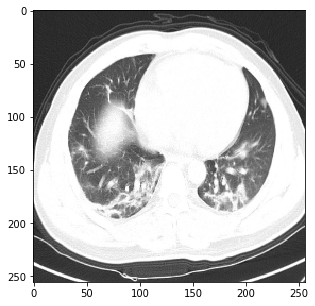

In [8]:
# Showing an example from training data - set

image_example = 400   # out of 746

f = plt.figure(figsize=(5, 5))
plt.imshow(x_trainig_set_of_orig_resized_img_arr[image_example])

if(y_traing_set[0][image_example] == 1):
    print("Covid Patient")
else:
    print("Healthy Person")



In [9]:
#  Splitting the data

X_train, X_test, y_train, y_test = train_test_split(train_set_flattented, y_traing_set.T, test_size = 0.33, random_state = 42)



In [10]:
# Building the Model By SVM

model=SVC()
model.fit(X_train, y_train)
y_predict = model.predict(X_test)


# accuracy Analysis
print("By SVM")
print("Model Score :",model.score(X_test, y_test))
print()
print("Accuracy :",metrics.accuracy_score(y_test, y_predict))
print()
print("Confusio Mtrix :")
print(metrics.confusion_matrix(y_test, y_predict))
print("F1-score = ", f1_score(y_test, y_predict))

D:\Anaconda installation\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


By SVM
Model Score : 0.9959514170040485

Accuracy : 0.9959514170040485

Confusio Mtrix :
[[138   1]
 [  0 108]]
F1-score =  0.9953917050691244


In [11]:
# Building the Model by Logistic regressions

model = LogisticRegression(solver= 'lbfgs', max_iter = 500)
model.fit(X_train, y_train)
y_predict = model.predict(X_test)

# accuracy Analysis
print("By Logistic regressions")
print("Model Score :",model.score(X_test, y_test))
print()
print("Accuracy :",metrics.accuracy_score(y_test, y_predict))
print()
print("Confusion Mtrix :")
print(metrics.confusion_matrix(y_test, y_predict))
print("F1-score = ", f1_score(y_test, y_predict))

D:\Anaconda installation\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


By Logistic regressions
Model Score : 0.9919028340080972

Accuracy : 0.9919028340080972

Confusion Mtrix :
[[137   2]
 [  0 108]]
F1-score =  0.9908256880733944
